In [1]:
!pip install scikit-fuzzy

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


Importación de librerías

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Leyendo archivos

In [130]:
latte = pd.read_csv(filepath_or_buffer="latte.csv")
print(latte)

    tamano temperatura intensidad   agua   cafe  leche tiempo
0  Pequeno        Frio      Suave   Poca   Poca  Media  Media
1  Pequeno    Caluroso      Medio   Poca   Poca   Poca   Poca
2  Mediano      Calido      Medio  Media  Media  Media   Poca
3  Mediano    Caluroso     Fuerte  Media  Mucha   Poca   Poca
4   Grande        Frio     Fuerte  Mucha  Mucha   Poca  Mucha
5   Grande      Calido      Suave  Mucha   Poca  Mucha  Media


In [2]:
mokaccino = pd.read_csv(filepath_or_buffer="mokaccino.csv")
print(mokaccino)

    tamano temperatura intensidad   agua   cafe  leche chocolate tiempo
0  Pequeno      Calido     Fuerte   Poca  Media   Poca      Poca   Poca
1  Pequeno    Caluroso      Suave   Poca   Poca  Media      Poca   Poca
2  Mediano        Frio      Medio  Media  Media  Media      Poca  Media
3  Mediano    Caluroso     Fuerte  Media  Media   Poca      Poca   Poca
4   Grande        Frio     Fuerte  Mucha  Media  Media      Poca  Mucha
5   Grande      Calido      Suave  Mucha   Poca  Media      Poca  Media


In [118]:
capuccino = pd.read_csv(filepath_or_buffer="capuccino.csv")
print(capuccino)

    tamano temperatura intensidad   agua   cafe  leche tiempo
0  Pequeno        Frio      Suave   Poca   Poca  Media  Media
1  Pequeno      Calido     Fuerte   Poca  Media   Poca   Poca
2  Mediano      Calido      Medio  Media  Media  Media  Media
3  Mediano    Caluroso     Fuerte  Media  Media   Poca   Poca
4   Grande      Calido      Suave  Mucha   Poca  Media  Media
5   Grande        Frio     Fuerte  Mucha  Media   Poca  Mucha


In [46]:
espresso = pd.read_csv(filepath_or_buffer="espresso.csv")
print(espresso)

    tamano temperatura intensidad   agua   cafe tiempo
0  Pequeno        Frio      Suave   Poca   Poca  Media
1  Pequeno      Calido     Fuerte   Poca  Media   Poca
2  Mediano      Calido      Medio  Media   Poca   Poca
3  Mediano    Caluroso     Fuerte  Media  Media   Poca
4   Grande        Frio      Suave  Mucha  Media  Media
5   Grande    Caluroso      Medio  Mucha  Media   Poca


# Antecedentes

* Tamaño del café: Pequeño, Mediano y Grande.


In [3]:
tamano = ctrl.Antecedent(np.arange(0, 450, 1), "Tamaño")

tamano["Pequeno"] = fuzz.zmf(tamano.universe,0,200) 
tamano["Mediano"] = fuzz.gaussmf(tamano.universe,225,80)
tamano["Grande"] = fuzz.smf(tamano.universe,250,450)

#tamano.automf(3)

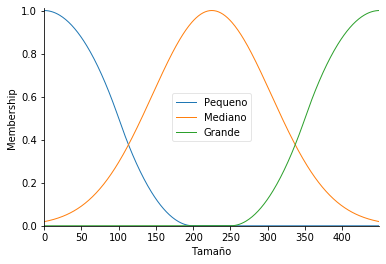

In [240]:
tamano.view()



*   Intensidad del cafe: Suave, Medio y Fuerte



In [4]:
intensidad = ctrl.Antecedent(np.arange(0, 5, 1), "Intensidad")

intensidad["Suave"] = fuzz.zmf(intensidad.universe,0,5) 
intensidad["Medio"] = fuzz.gaussmf(intensidad.universe,2,0.8)
intensidad["Fuerte"] = fuzz.smf(intensidad.universe,0,5)

#intensidad.automf(3)

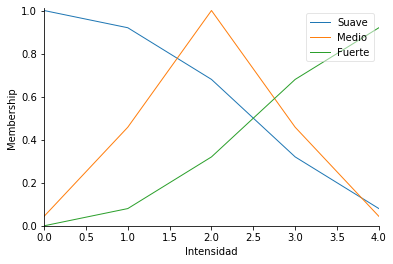

In [207]:
intensidad.view()


*  Temperatura de ambiente: Frio, Caliente y Caluroso



In [5]:
temperatura = ctrl.Antecedent(np.arange(0, 30 ,1), "Temperatura")

temperatura["Frio"] = fuzz.zmf(temperatura.universe,0,30) 
temperatura["Calido"] = fuzz.gaussmf(temperatura.universe,15,5)
temperatura["Caluroso"] = fuzz.smf(temperatura.universe,0,30)

#temperatura.automf(3)

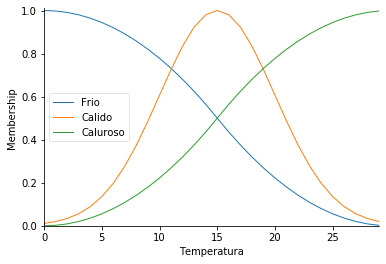

In [209]:
temperatura.view()

# Consecuentes

*  Leche: Poca, Media y Mucha.

In [6]:
leche = ctrl.Consequent(np.arange(0, 40, 1), "Leche")

leche["Poca"] = fuzz.zmf(leche.universe,0,40)
leche["Media"] = fuzz.gaussmf(leche.universe,20,7)
leche["Mucha"] = fuzz.smf(leche.universe,0,40)

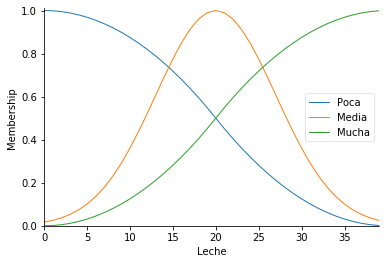

In [211]:
leche.view()


*  Chocolate: Poco, Medio y Mucho.

In [7]:
chocolate = ctrl.Consequent(np.arange(0, 40, 1), "Chocolate")
chocolate["Poca"] = fuzz.zmf(chocolate.universe,0,40)
chocolate["Media"] = fuzz.gaussmf(chocolate.universe,20,7)
chocolate["Mucha"] = fuzz.smf(chocolate.universe,0,40)

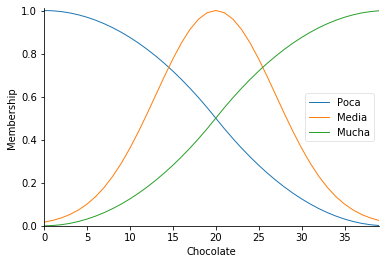

In [213]:
chocolate.view()


* Nivel de agua: Poca, Media y Mucha.

In [8]:
agua = ctrl.Consequent(np.arange(0, 450, 1), "Agua")
agua["Poca"] = fuzz.zmf(agua.universe,0,400)
agua["Media"] = fuzz.gaussmf(agua.universe,200,85)
agua["Mucha"] = fuzz.smf(agua.universe,0,400)

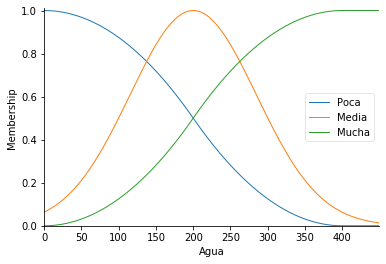

In [220]:
agua.view()



*   Café: Poco, Media y Mucho.



In [9]:
cafe = ctrl.Consequent(np.arange(0, 40, 1), "Cafe")
cafe["Poca"] = fuzz.zmf(cafe.universe,0,40)
cafe["Media"] = fuzz.gaussmf(cafe.universe,20,7)
cafe["Mucha"] = fuzz.smf(cafe.universe,0,40)

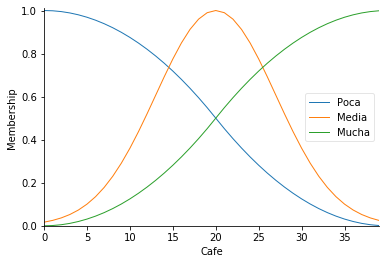

In [222]:
cafe.view()



*   Tiempo: Poca, Media y Mucha.



In [10]:
tiempo = ctrl.Consequent(np.arange(0, 7, 1), "Tiempo")
tiempo["Poca"] = fuzz.zmf(tiempo.universe,0,7)
tiempo["Media"] = fuzz.gaussmf(tiempo.universe, 3,1.1)
tiempo["Mucha"] = fuzz.smf(tiempo.universe,0,7)

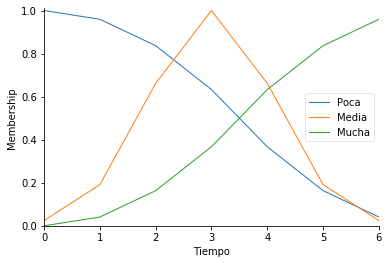

In [224]:
tiempo.view()

# Reglas

## Cafe Expresso 

In [225]:
reglasEspresso = []

for index, row in espresso.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]])
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasEspresso.append(regla)

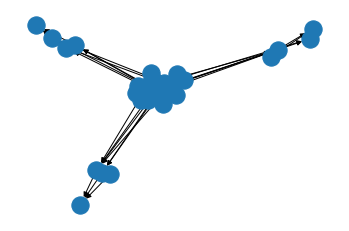

In [226]:
espressoCtrl = ctrl.ControlSystem(reglasEspresso)
espressoCtrl.view()
preparacionEspresso = ctrl.ControlSystemSimulation(espressoCtrl)

In [227]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 450
Temperatura ambiente: 30
Intensidad del café: 5


In [228]:
preparacionEspresso.input["Tamaño"] = int(size)
preparacionEspresso.input["Temperatura"] = int(temperature)
preparacionEspresso.input["Intensidad"] = int(intenity)
preparacionEspresso.compute()

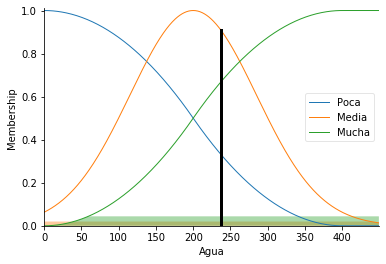

In [229]:
agua.view(sim = preparacionEspresso)

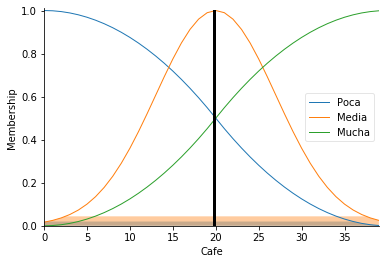

In [230]:
cafe.view(sim = preparacionEspresso)

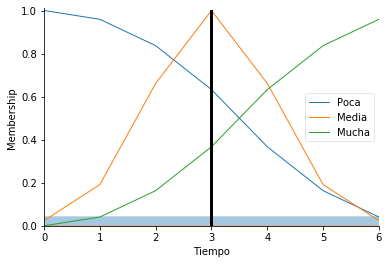

In [231]:
tiempo.view(sim = preparacionEspresso)

In [232]:
print("Agua (ml): {}".format(preparacionEspresso.output["Agua"]))
print("Café (gr): {}".format(preparacionEspresso.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionEspresso.output["Tiempo"]))

Agua (ml): 237.50349588581886
Café (gr): 19.736543687717177
Tiempo (min): 2.9995486979872665


## Cafe Capuccino 

In [192]:
reglasCapuccino = []

for index, row in capuccino.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]], leche[row["leche"]] )
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasCapuccino.append(regla)

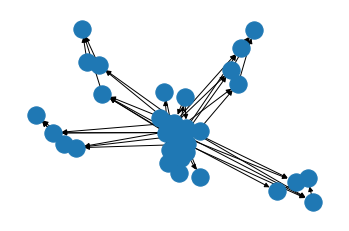

In [193]:
capuccinoCtrl = ctrl.ControlSystem(reglasCapuccino)
capuccinoCtrl.view()
preparacionCapuccino = ctrl.ControlSystemSimulation(capuccinoCtrl)

In [194]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 450
Temperatura ambiente: 30
Intensidad del café: 5


In [195]:
preparacionCapuccino.input["Tamaño"] = int(size)
preparacionCapuccino.input["Temperatura"] = int(temperature)
preparacionCapuccino.input["Intensidad"] = int(intenity)
preparacionCapuccino.compute()

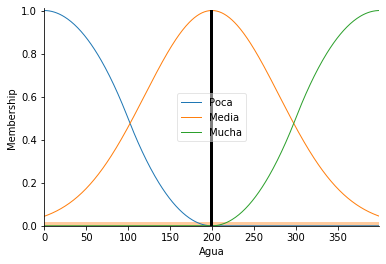

In [196]:
agua.view(sim = preparacionCapuccino)

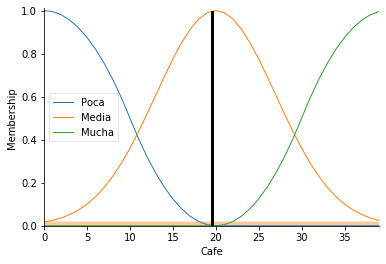

In [197]:
cafe.view(sim = preparacionCapuccino)

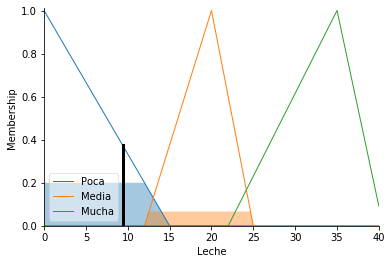

In [84]:
leche.view(sim = preparacionCapuccino)

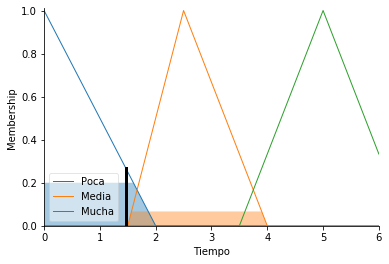

In [85]:
tiempo.view(sim = preparacionCapuccino)

In [123]:
print("Agua (ml): {}".format(preparacionCapuccino.output["Agua"]))
print("Café (gr): {}".format(preparacionCapuccino.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionCapuccino.output["Tiempo"]))
print("Leche (ml): {}".format(preparacionCapuccino.output["Leche"]))

Agua (ml): 224.5086050398811
Café (gr): 19.500000000000018
Tiempo (min): 3.0
Leche (ml): 19.500000000000018


## Cafe Latte 

In [185]:
reglasLatte = []

for index, row in latte.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]], leche[row["leche"]])
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasLatte.append(regla)

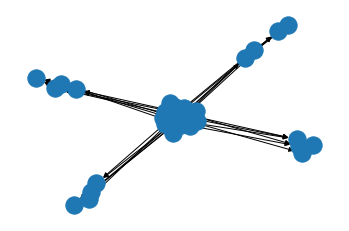

In [186]:
latteCtrl = ctrl.ControlSystem(reglasLatte)
latteCtrl.view()
preparacionLatte = ctrl.ControlSystemSimulation(latteCtrl)

In [187]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 450
Temperatura ambiente: 30
Intensidad del café: 5


In [188]:
preparacionLatte.input["Tamaño"] = int(size)
preparacionLatte.input["Temperatura"] = int(temperature)
preparacionLatte.input["Intensidad"] = int(intenity)
preparacionLatte.compute()

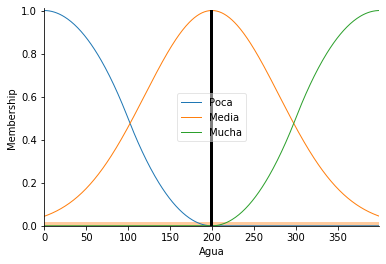

In [189]:
agua.view(sim = preparacionLatte)

In [ ]:
cafe.view(sim = preparacionLatte)

In [ ]:
leche.view(sim = preparacionLatte)

In [ ]:
tiempo.view(sim = preparacionLatte)

In [ ]:
print("Agua (ml): {}".format(preparacionLatte.output["Agua"]))
print("Café (gr): {}".format(preparacionLatte.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionLatte.output["Tiempo"]))
print("Leche (ml): {}".format(preparacionLatte.output["Leche"]))

## Cafe Mokaccino 

In [11]:
reglasMokaccino = []

for index, row in mokaccino.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]], leche[row["leche"]], chocolate[row["chocolate"]] )
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasMokaccino.append(regla)

/home/huaso/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/huaso/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
/home/huaso/.local/lib/python3.6/site-packages/skfuzzy/control/controlsystem.py:133: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


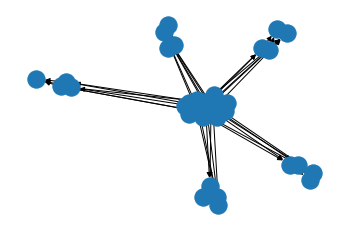

In [12]:
mokaccinoCtrl = ctrl.ControlSystem(reglasMokaccino)
mokaccinoCtrl.view()
preparacionMokaccino = ctrl.ControlSystemSimulation(mokaccinoCtrl)

In [13]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 123
Temperatura ambiente: 12
Intensidad del café: 2


In [14]:
preparacionMokaccino.input["Tamaño"] = int(size)
preparacionMokaccino.input["Temperatura"] = int(temperature)
preparacionMokaccino.input["Intensidad"] = int(intenity)
preparacionMokaccino.compute()

/home/huaso/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


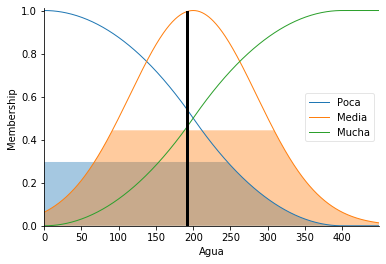

In [15]:
agua.view(sim = preparacionMokaccino)

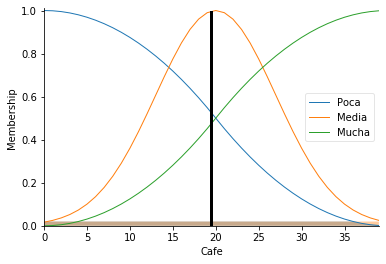

In [248]:
cafe.view(sim = preparacionMokaccino)

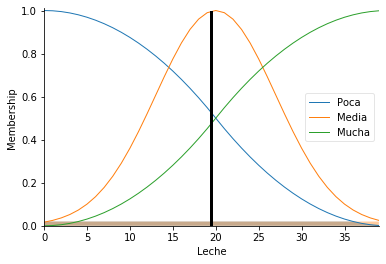

In [249]:
leche.view(sim = preparacionMokaccino)

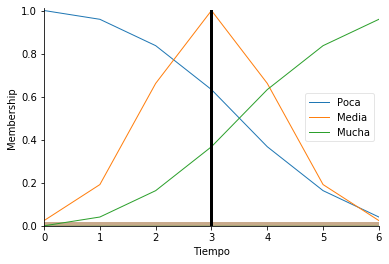

In [250]:
tiempo.view(sim = preparacionMokaccino)

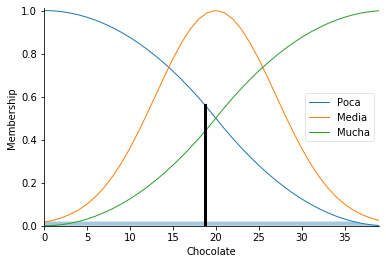

In [251]:
chocolate.view(sim = preparacionMokaccino)

In [16]:
print("Agua (ml): {}".format(preparacionMokaccino.output["Agua"]))
print("Café (gr): {}".format(preparacionMokaccino.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionMokaccino.output["Tiempo"]))
print("Leche (ml): {}".format(preparacionMokaccino.output["Leche"]))
print("Chocolate (ml): {}".format(preparacionMokaccino.output["Chocolate"]))

Agua (ml): 191.2335131497901
Café (gr): 17.83513199634915
Tiempo (min): 2.7227570784116364
Leche (ml): 17.614982932276003
Chocolate (ml): 14.083794053479387
